In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

from datasets import load_dataset
import seaborn as sns

In [8]:
dataset = load_dataset("imdb")

# Convert to Pandas for easier handling
train_data = pd.DataFrame(dataset["train"])
test_data = pd.DataFrame(dataset["test"])

print(train_data.head())

                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


In [9]:
X_train, y_train = train_data["text"], train_data["label"]
X_test, y_test = test_data["text"], test_data["label"]

# Vectorization: Convert text → numeric
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

🔹 Naive Bayes

In [10]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



🔹 Logistic Regression

In [11]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Naive Bayes Accuracy: 0.839
Logistic Regression Accuracy: 0.87784


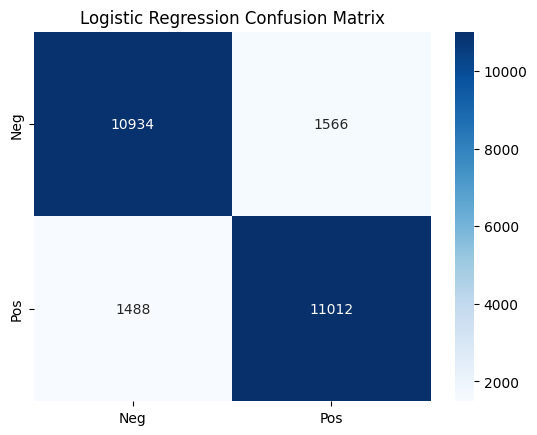

In [12]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

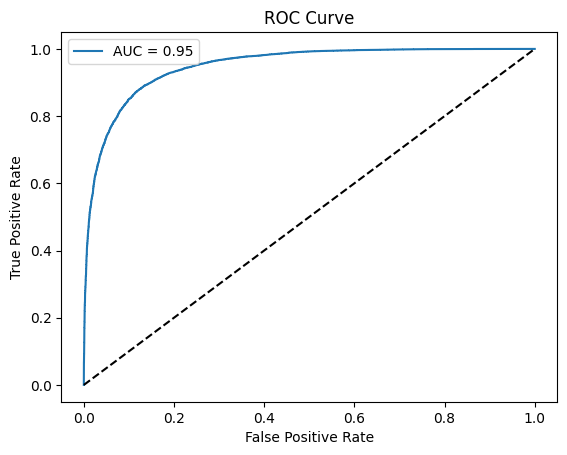

In [13]:
y_prob = lr.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [14]:
feature_names = tfidf.get_feature_names_out()
coefficients = lr.coef_[0]
top_positive = np.argsort(coefficients)[-10:]
top_negative = np.argsort(coefficients)[:10]

print("Top positive words:", feature_names[top_positive])
print("Top negative words:", feature_names[top_negative])


Top positive words: ['fun' 'today' 'loved' 'favorite' 'amazing' 'wonderful' 'perfect' 'best'
 'excellent' 'great']
Top negative words: ['worst' 'bad' 'waste' 'awful' 'boring' 'poor' 'worse' 'poorly' 'terrible'
 'disappointment']
